#### 1. Random forests for image approximation

Salvador Galarza, Abraham Hill

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.ensemble import RandomForestClassifier

##### part a)

(900, 604, 3)

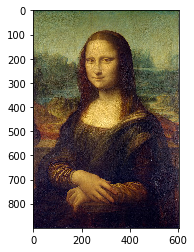

In [802]:
lisa = plt.imread('lisa.jpeg')
lisa_np = np.array(lisa)
lisa_np = np.reshape(lisa_np, (900, 604, 3)) / 255
plt.imshow(lisa)
lisa.shape

##### part b) Preprocessing the input.

In [803]:
lisa_5000 = np.ones((900, 604, 3)).astype(np.int32)
lisa_5000 = lisa_5000*255

In [804]:
lisa_test = np.ones((900, 604, 3)).astype(np.int32)
lisa_test = lisa_test*255

In [805]:
cords = []
for row in range(len(lisa_test)):
    for col in range(len(lisa_test[0])):
        cords.append((row,col))
coords = np.array(cords)
coords

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ...,
       [899, 601],
       [899, 602],
       [899, 603]])

In [806]:
coordinates = []
rgbs = []
for _ in range(5000):
    x, y = int(np.random.uniform(0,604)), int(np.random.uniform(0,900))
    coordinates.append((y,x))
    rgbs.append(lisa_5000[y][x])
    lisa_5000[y][x] = lisa[y][x]
coordinatest = []
k = 0
while len(coordinatest) < 5000:
    coordinatest += [tuple(coords[np.random.randint(k,k+108)])]
    k += 108
rgbs = [lisa_np[p[0], p[1]] for p in coordinatest]

(900, 604, 3)

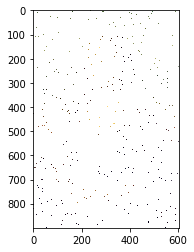

In [807]:
plt.imshow(lisa_5000, cmap='gray')
lisa_5000.shape

What other preprocessing steps are necessary for random forests inputs? Describe them,
implement them, and justify your decisions. In particular, do you need to perform mean
subtraction, standardization, or unit-normalization?

We standardized the pixel values to all be between 0 and 1.

##### part c) Preprocessing the output.

We regressed all three values at once, to map (x, y) coordinates to (r, g ,b) values: f : R2 → R3

##### part d)

In [808]:
# lisa_test = np.ones((900, 604, 3)).astype(np.int32)
# lisa_test = lisa_test*255

In [809]:
# coordTrain = []
# i = 0
# while len(coordTrain) < 5000:
#     coordTrain += [tuple(coords[np.random.randint(i,i+108)])]
#     i += 108

# rgbTrain = [lisa_np[c[0], c[1]] for c in coordTrain]

In [810]:
# cords = []
# for row in range(len(lisa_test)):
#     for col in range(len(lisa_test[0])):
#         cords.append((row,col))
# coords = np.array(cords)
# coords

In [811]:
clf = RandomForestRegressor(n_estimators=5, max_depth=10)
clf.fit(coordinatest, rgbs)

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

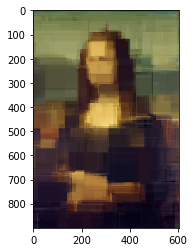

In [812]:
predictions = np.reshape(clf.predict(coords), (900,604,3))
plt.imshow(predictions)

##### part e) Experimentation

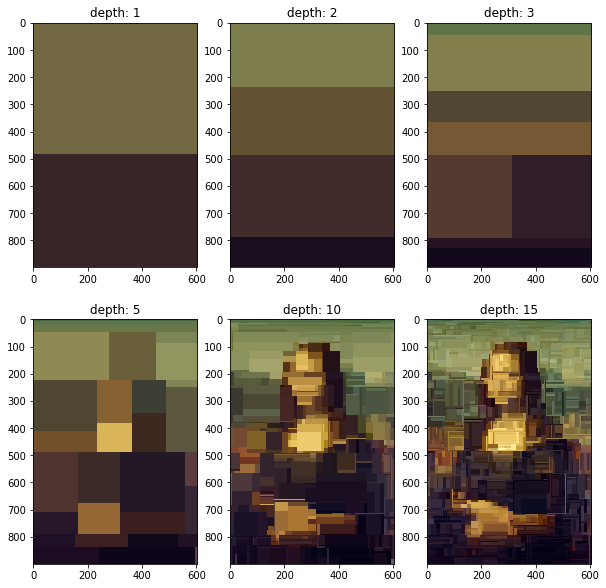

In [826]:
# depths 1, 2, 3, 5, 10, and 15, trees=1
depths = [1, 2, 3, 5, 10, 15]
preds = []
for depth in depths:
    clf = RandomForestRegressor(max_depth=depth, n_estimators = 1)
    clf.fit(coordinatest, rgbs)
    predictions = np.reshape(clf.predict(coords), (900,604,3))
    preds.append(predictions)

_, axs = plt.subplots(2, 3, figsize=(10, 10))
axs = axs.flatten()
i = 0
for img, ax in zip(preds, axs):
    ax.set_title("depth: {}".format(depths[i]))
    ax.imshow(img)
    i+=1
plt.show()
# plt.imshow(preds[0])
#plot https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib

##### How does depth impact the result? Describe in detail why.

The more depth the better image approximation with more detail. This is because we get more approximated rectangles.

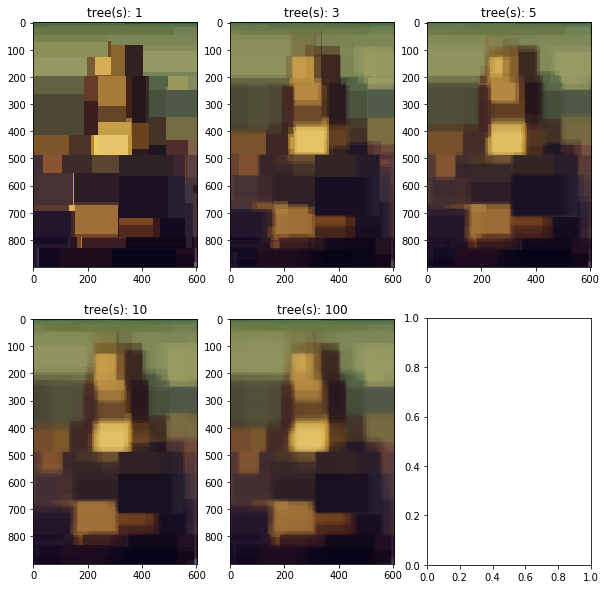

In [830]:
# trees 1, 3, 5, 10, and 100, depth=7
trees = [1, 3, 5, 10, 100]
preds = []
for tree in trees:
    clf = RandomForestRegressor(max_depth=7, n_estimators = tree)
    clf.fit(coordinatest, rgbs)
    predictions = np.reshape(clf.predict(coords), (900,604,3))
    preds.append(predictions)

_, axs = plt.subplots(2, 3, figsize=(10, 10))
axs = axs.flatten()
i = 0
for img, ax in zip(preds, axs):
    ax.set_title("tree(s): {}".format(trees[i]))
    ax.imshow(img)
    i+=1
plt.show()
# plt.imshow(preds[0])
#plot https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib

##### How does the number of trees impact the result? Describe in detail why.

With more trees the more detail in the approximation. Specifically the better blended the rectangles become with eachother. 

In [831]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(coordinatest, rgbs)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

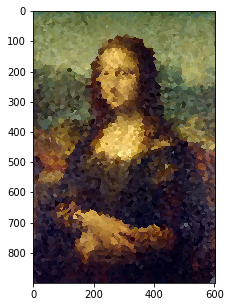

In [838]:
predictions = np.reshape(knn.predict(coords), (900,604,3))
plt.figure(figsize=[5,5])
plt.imshow(predictions)

##### Compare and contrast the outlook: why does this look the way it does?

The knn approximated image has more detail with smaller shapes while the tree imagee has less detail with larger rectangular chunks being approximated to be the same.

##### part f) Analysis.

##### i. What is the decision rule at each split point? Write down the 1-line formula for the split point at the root node for one the trained decision trees inside the forest. Feel free to define any variables you need.

At each split point we compare the x,y coordinate to the value at each node. r,g,b -> x, y -> r,g,b

##### ii. Why does the resulting image look like the way it does? What shape are the patches of color, and how are they arranged?

The image looks rectangular because the model maps coordinate values to rgb values and assigns neighbors to the same values creating these rectangular patches.

##### iii. Straightforward: How many patches of color may be in the resulting image if the forest contains a single decision tree? Define any variables you need and provide an upper bound.

As seen by part e, the max_number_of_rectangles = 2^(max_depth) with a larger max_depth we get more rectangles rsulting in more detail in the approximated image.

##### iv. Tricky: How many patches of color might be in the resulting image if the forest contains n decision trees? Define any variables you need and provide an upper bound.

The number of patches with n decision trees would be: max_number_of_rectangles = n_estimators*2^(max_depth). Do note that this is the max number so the outcome may be smaller in some cases.